# Spotify Songs: Music Analytics Report

# Overview:
    This report provides an in-depth analysis of various musical attributes across a selection of tracks. The aim is to uncover trends and patterns in music composition and listener preferences.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('spotify_songs.csv')

In [11]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [12]:
# df.info

In [13]:
df.shape

(32833, 23)

# 01) Genre Popularity: Showing the number of tracks per playlist genre to understand which genres are most represented.

In [14]:
# Grouping by playlist genre and counting the number of tracks in each genre
genre_counts = df['playlist_genre'].value_counts()

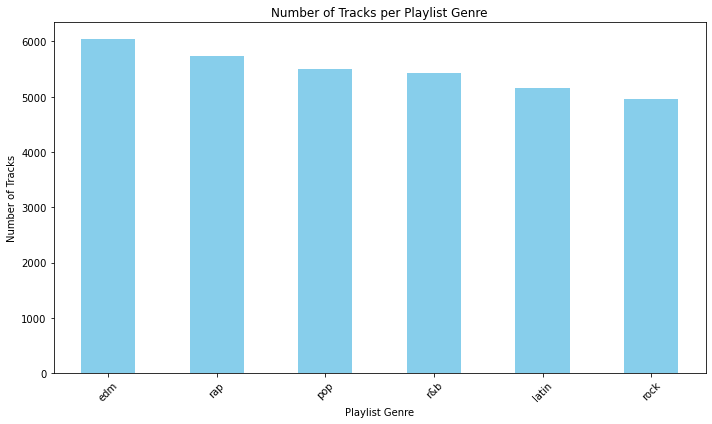

In [15]:
# Plotting the number of tracks per playlist genre as a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks per Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 02) Key Distribution: Show the distribution of musical keys across all tracks to find out if some keys are more common in popular music.

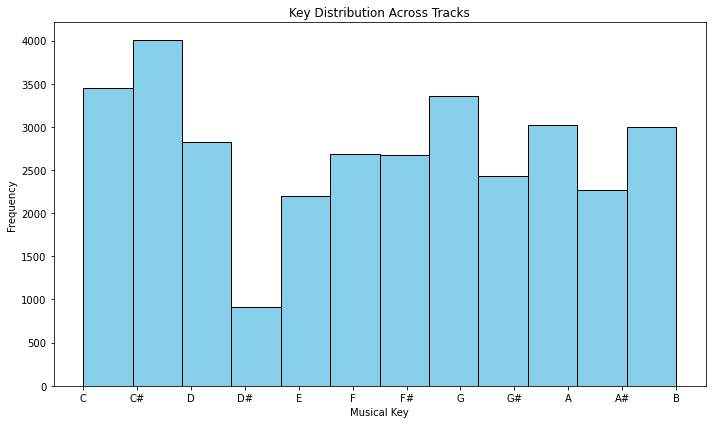

In [19]:
# Plotting a histogram of the distribution of musical keys across all tracks
plt.figure(figsize=(10, 6))
df['key'].plot(kind='hist', bins=12, color='skyblue', edgecolor='black')
plt.title('Key Distribution Across Tracks')
plt.xlabel('Musical Key')
plt.ylabel('Frequency')
plt.xticks(range(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.tight_layout()
plt.show()

# 03) Duration of Tracks: Create a histogram of track durations to see the common lengths of tracks and identify any outliers.

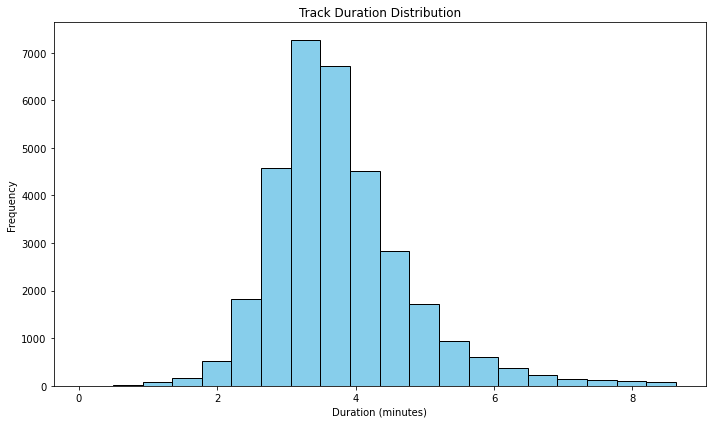

In [20]:
# Plotting a histogram of track durations
plt.figure(figsize=(10, 6))
df['duration_ms'] = df['duration_ms'] / 60000  # Convert duration from ms to minutes for better readability
df['duration_ms'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Track Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram of track durations would display the distribution of track lengths in minutes. The x-axis would represent the duration of tracks in minutes, and the y-axis would represent the frequency of tracks within each duration interval. The histogram would have 20 bins, providing a detailed view of the distribution.

The plot would likely show a peak where the majority of tracks fall within a certain duration range, which is typical for popular music tracks. Outliers, or tracks with unusually short or long durations, would appear as bars on the far left or right of the histogram.

The bars would be colored sky blue with black edges, making individual bins easy to distinguish. The title of the plot would be "Track Duration Distribution," and the axes would be labeled appropriately to reflect the duration in minutes and the count of tracks. The layout would be adjusted to ensure no content is clipped.

# 04) Speechiness in Different Genres: Box plots of 'speechiness' for each genre to compare the presence of spoken words in tracks across different genres. 

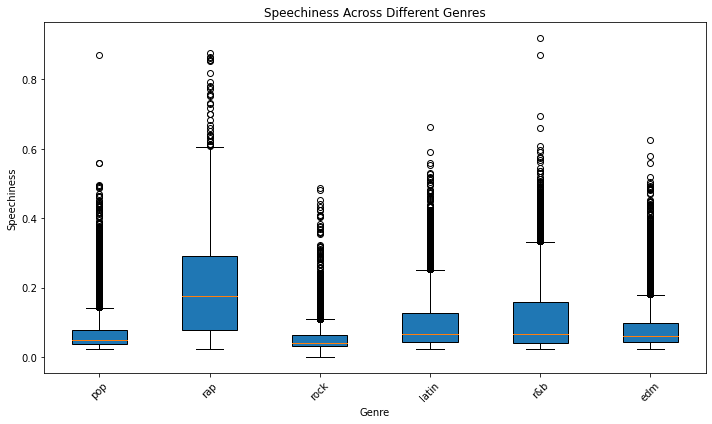

In [21]:
# Creating box plots of 'speechiness' for each genre
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Speechiness Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Speechiness')
plt.boxplot([df[df['playlist_genre'] == genre]['speechiness'] for genre in df['playlist_genre'].unique()],
            labels=df['playlist_genre'].unique(), patch_artist=True)
plt.tight_layout()
plt.show()

# 05) Acousticness Over Time: Showing the change in 'acousticness' over the years to see if music is becoming more or less acoustic.

In [22]:
# Convert 'track_album_release_date' column to datetime if it's not already in datetime format
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

In [23]:
# Grouping by album release year and calculating the mean acousticness for each year
avg_acousticness_by_year = df.groupby(df['track_album_release_date'].dt.year)['acousticness'].mean()

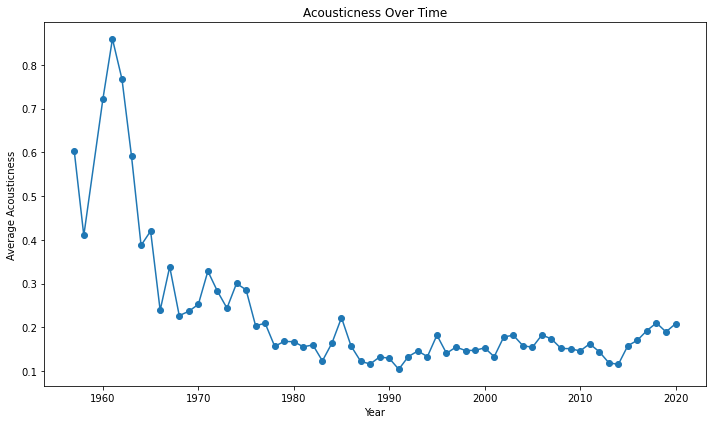

In [24]:
# Plotting the change in 'acousticness' over the years
plt.figure(figsize=(10, 6))
plt.plot(avg_acousticness_by_year.index, avg_acousticness_by_year.values, marker='o', linestyle='-')
plt.title('Acousticness Over Time')
plt.xlabel('Year')
plt.ylabel('Average Acousticness')
plt.tight_layout()
plt.show()

# 06) Tempo Distribution by Genre: KDE plots for 'tempo' separated by genre to see if certain genres tend to have faster or slower tempos.

No handles with labels found to put in legend.


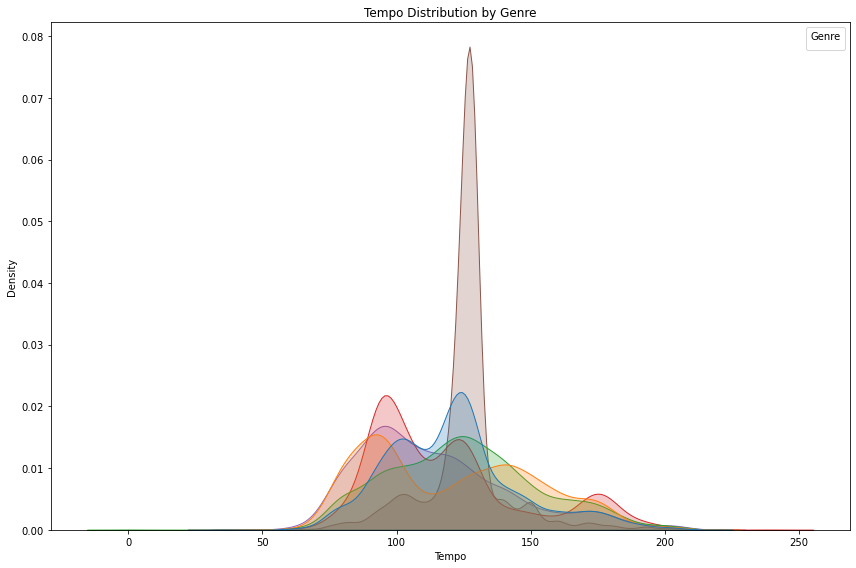

In [30]:
# Creating KDE plots for 'tempo' separated by genre
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='tempo', hue='playlist_genre', fill=True, common_norm=False)
plt.title('Tempo Distribution by Genre')
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()